# **Dealer Pricing Model**

## Step 1: Import the necessary libraries

In [170]:
import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import pickle

#for model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 2: Load the dataset

In [171]:
df = pd.read_csv('order.csv')

## Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [172]:
df.head(5)

,request_date,state_id,product_group_id,material_code,rate
0,11-10-2019,7,1,4000061,56800
1,11-10-2019,5,1,4000061,54500
2,11-10-2019,5,1,4000061,54500
3,11-10-2019,4,1,4000061,53500
4,11-10-2019,5,1,4000061,54500


In [173]:
df.tail(5)

,request_date,state_id,product_group_id,material_code,rate
217929,19-10-2024,4,5,4600101,73000
217930,19-10-2024,3,5,4600101,74900
217931,19-10-2024,14,5,4600101,73900
217932,19-10-2024,3,5,4600103,74900
217933,19-10-2024,14,5,4600103,73900


In [174]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217934 entries, 0 to 217933
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   request_date      217934 non-null  object
 1   state_id          217934 non-null  int64 
 2   product_group_id  217934 non-null  int64 
 3   material_code     217934 non-null  int64 
 4   rate              217934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ MB

Shape of the data
(217934, 5)


In [175]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217934 entries, 0 to 217933
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   request_date      217934 non-null  object
 1   state_id          217934 non-null  int64 
 2   product_group_id  217934 non-null  int64 
 3   material_code     217934 non-null  int64 
 4   rate              217934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ MB

Shape of the data
(217934, 5)


## Step 4: Statistical Insights

Obtain the mean, standard deviation, etc. from the data

In [176]:
df.describe()

,state_id,product_group_id,material_code,rate
count,217934.000000,217934.000000,2.179340e+05,217934.000000
mean,7.426826,1.161379,4.049539e+06,72921.527518
std,6.477766,0.665817,1.347495e+05,8723.769501
min,3.000000,1.000000,4.000061e+06,6800.000000
25%,3.000000,1.000000,4.000071e+06,70300.000000
50%,5.000000,1.000000,4.000072e+06,74300.000000
75%,7.000000,1.000000,4.000074e+06,77700.000000
max,33.000000,5.000000,4.700026e+06,818000.000000


## Step 5: Data Cleaning

Making sure that data is ready to train the model

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217934 entries, 0 to 217933
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   request_date      217934 non-null  object
 1   state_id          217934 non-null  int64 
 2   product_group_id  217934 non-null  int64 
 3   material_code     217934 non-null  int64 
 4   rate              217934 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 8.3+ MB


In [178]:
# Convert 'request_date' to datetime with dayfirst=True
df['request_date'] = pd.to_datetime(df['request_date'], dayfirst=True)

# Extract year and month
df['year'] = df['request_date'].dt.year
df['month'] = df['request_date'].dt.month

# Display the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217934 entries, 0 to 217933
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   request_date      217934 non-null  datetime64[ns]
 1   state_id          217934 non-null  int64         
 2   product_group_id  217934 non-null  int64         
 3   material_code     217934 non-null  int64         
 4   rate              217934 non-null  int64         
 5   year              217934 non-null  int32         
 6   month             217934 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(4)
memory usage: 10.0 MB


## Step 6: Data Visualisation

### Correlation

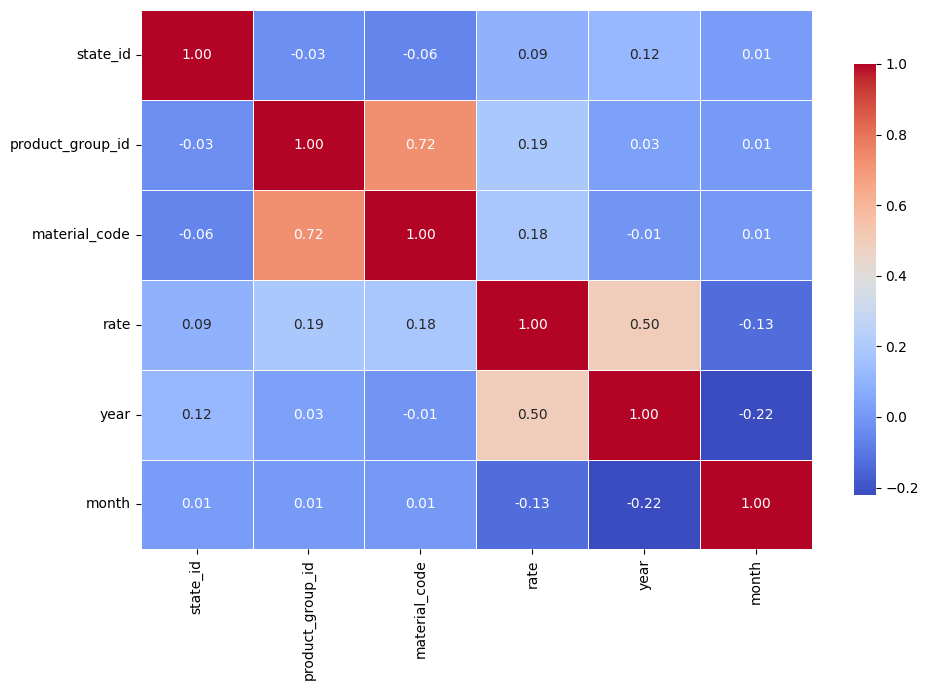

In [179]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corrmat = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(corrmat, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={'shrink': 0.8})

plt.tight_layout()
plt.show()

## Step 8: Data Modelling

* Train-Test-Split
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best

### Determine X and Y

In [180]:
df = df.drop(['request_date'],axis=1)
X= df.drop(['rate'],axis=1)
Y= df['rate']

### Splitting the Dataset

In [181]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

##### LINEAR REGRESSION

In [182]:
lrf = LinearRegression()
lrf.fit(X_train,Y_train)
Y_pred_lrf = lrf.predict(X_test)

##### DECISION TREE REGRESSOR

In [183]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
Y_pred_dtr = dtr.predict(X_test)

##### RIDGE REGRESSION

##### LASSO REGRESSION

## Step 9: Model Evaluation

In [184]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred_lrf)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred_lrf)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r_squared = r2_score(Y_test, Y_pred_lrf)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 5512.951916847611
Mean Squared Error (MSE): 48727915.570460826
Root Mean Squared Error (RMSE): 6980.538343885866
R-squared (R²): 0.30771810963268553


In [185]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred_dtr)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred_dtr)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²)
r_squared = r2_score(Y_test, Y_pred_dtr)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")


Mean Absolute Error (MAE): 480.4373209764585
Mean Squared Error (MSE): 1277330.0730471401
Root Mean Squared Error (RMSE): 1130.1902817876023
R-squared (R²): 0.9818528564737511


In [186]:
pickle.dump(dtr, open('dtr.pkl', 'wb'))

## Step 10: Testing the Model

- Take user input and predict the output

In [187]:
# CSV To DataFrame
input_data = pd.read_csv('ordertest.csv')

# Loading trained model
with open('dtr.pkl', 'rb') as file:
    model = pickle.load(file)

# Make predictions
predictions = model.predict(input_data)

# Saving Predictions
output_df = pd.DataFrame(predictions, columns=['Predicted'])
output_df.to_csv('output_file.csv', index=False)

predictions

array([75800.        , 72484.75073314, 72300.        , ...,
       62000.        , 62000.        , 62000.        ])